In [1]:
%load_ext autoreload
%autoreload 2
from data_loader import load_datasets, create_data_loaders
import torch
from training_pipeline import train_with_different_parameters, plot_results
from cnn_model import Net
import numpy as np
import random

SEED = 42


In [2]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

In [3]:
set_seed(SEED)
batch_size = 64

In [4]:
train, val, test = load_datasets((32, 32))
train_dat, val_dat, test_dat = create_data_loaders(train, val, test, batch_size)

### Learning rate test

In [5]:
set_seed(SEED)
train_with_different_parameters(5, Net, 10, train_dat, val_dat, test_dat, 'cuda', batch_size, lrs=[i/500 for i in range(1,6)])

training iteration: 1 of 5
starting training...
epoch: 1, training loss: 0.027251175389024947, training accuracy: 34.022222222222226
epoch: 1, validation loss: 1.509980493121677e-05, validation accuracy: 43.827777777777776
model saved

epoch: 2, training loss: 0.024445606304539576, training accuracy: 41.99888888888889
epoch: 2, validation loss: 9.555004702674018e-06, validation accuracy: 46.306666666666665
model saved

epoch: 3, training loss: 0.023423221050368415, training accuracy: 44.88666666666666
epoch: 3, validation loss: 1.291909482744005e-05, validation accuracy: 48.26444444444444

epoch: 4, training loss: 0.02288557147582372, training accuracy: 46.074444444444445
epoch: 4, validation loss: 1.3570190800560846e-05, validation accuracy: 51.202222222222225

epoch: 5, training loss: 0.022509137505955165, training accuracy: 47.492222222222225
epoch: 5, validation loss: 9.595686859554715e-06, validation accuracy: 50.952222222222225

epoch: 6, training loss: 0.022221468182404835, trai

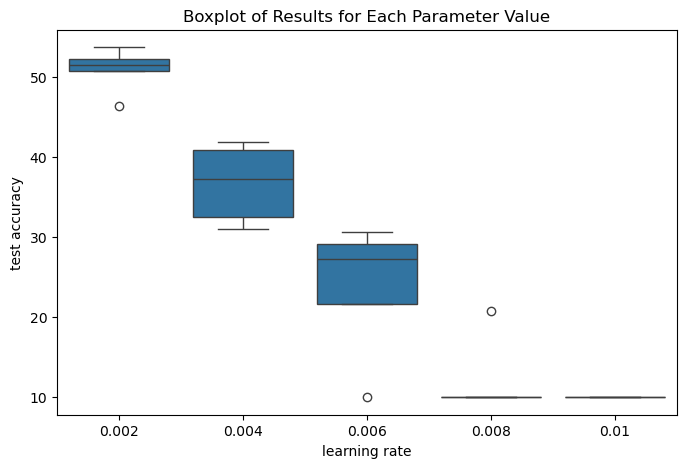

In [4]:
lrs = [i/500 for i in range(1,6)]
plot_results(5, batchsize=batch_size, lrs=lrs, dropouts=[0.5], betas=[(0.9,0.999)], x_values=lrs, x_label="learning rate")

### Dropout test

In [5]:
set_seed(SEED)
train_with_different_parameters(5, Net, 10, train_dat, val_dat, test_dat, 'cuda', batch_size, dropouts=[i/10 for i in range(3,8)])

training iteration: 1 of 5
starting training...
epoch: 1, training loss: 0.025519271704885695, training accuracy: 39.041111111111114
epoch: 1, validation loss: 1.1725966135660807e-05, validation accuracy: 47.632222222222225
model saved

epoch: 2, training loss: 0.021871849628951813, training accuracy: 48.9
epoch: 2, validation loss: 9.638751877678765e-06, validation accuracy: 53.31666666666667
model saved

epoch: 3, training loss: 0.020461461616886986, training accuracy: 52.71666666666667
epoch: 3, validation loss: 1.5207029713524713e-05, validation accuracy: 54.23888888888889

epoch: 4, training loss: 0.019610891047451232, training accuracy: 54.785555555555554
epoch: 4, validation loss: 1.349152856402927e-05, validation accuracy: 56.91888888888889

epoch: 5, training loss: 0.01897136344181167, training accuracy: 56.282222222222224
epoch: 5, validation loss: 1.2133418189154731e-05, validation accuracy: 58.39111111111111

epoch: 6, training loss: 0.01840299047364129, training accuracy: 

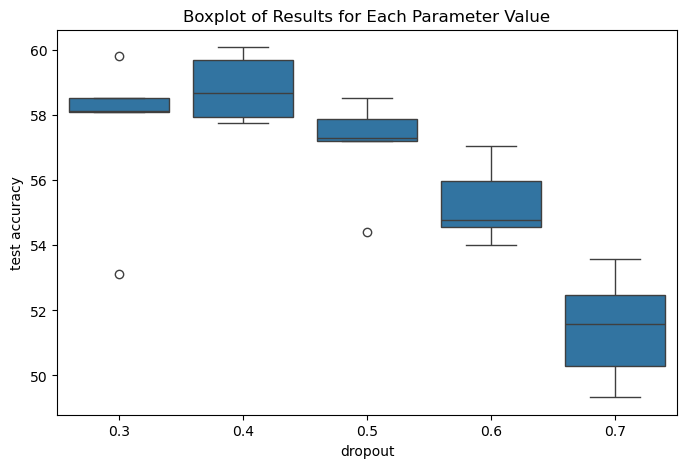

In [5]:
dropouts = [i/10 for i in range(3,8)]
plot_results(5, batchsize=batch_size, lrs=[0.001], dropouts=dropouts, betas=[(0.9,0.999)], x_values=dropouts, x_label="dropout")

### Betas tests

In [6]:
set_seed(SEED)
train_with_different_parameters(5, Net, 10, train_dat, val_dat, test_dat, 'cuda', batch_size, betas=[(1-i/10, 1-i/1000) for i in range(2,6)])

training iteration: 1 of 5
starting training...
epoch: 1, training loss: 0.0264919051806132, training accuracy: 36.507777777777775
epoch: 1, validation loss: 1.4587538772159153e-05, validation accuracy: 47.16444444444444
model saved

epoch: 2, training loss: 0.02302271641890208, training accuracy: 46.06333333333333
epoch: 2, validation loss: 1.2178271346622044e-05, validation accuracy: 51.644444444444446
model saved

epoch: 3, training loss: 0.021815258909596336, training accuracy: 48.98555555555556
epoch: 3, validation loss: 1.1650627189212375e-05, validation accuracy: 53.63
model saved

epoch: 4, training loss: 0.021055379520522225, training accuracy: 51.24888888888889
epoch: 4, validation loss: 8.145835664537219e-06, validation accuracy: 54.434444444444445
model saved

epoch: 5, training loss: 0.020463518680466548, training accuracy: 52.59222222222222
epoch: 5, validation loss: 1.2533016999562582e-05, validation accuracy: 56.467777777777776

epoch: 6, training loss: 0.02011527396241

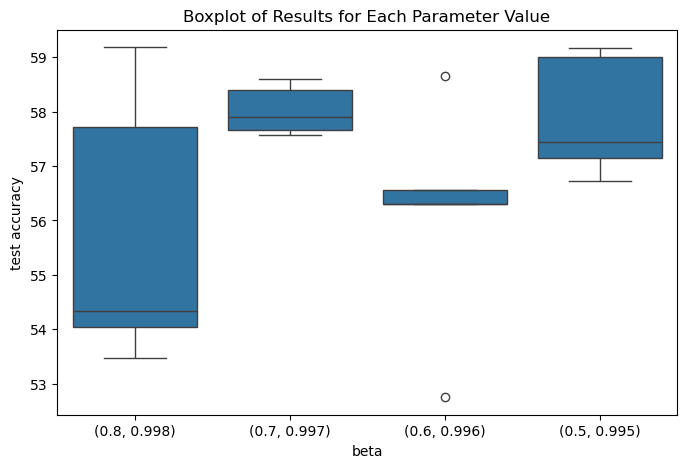

In [11]:
betas = [(1-i/10, 1-i/1000) for i in range(2,6)]
betas_str = [f"({1 - i / 10}, {1 - i / 1000})" for i in range(2,6)]
plot_results(5, batchsize=batch_size, lrs=[0.001], dropouts=[0.5], betas=betas, x_values=betas_str, x_label="beta")